In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage as ndi
from skimage import color, io, morphology
from skimage.filters import threshold_otsu

In [36]:
def imread_x(f,path,box=(0,792,0,85)):
    return color.rgb2gray(io.imread(
            r'D:\JulioFerreira\Mestrado\Imagens'
            + path + '(%d).jpg'%f)[box[0]:box[1],
                                   box[2]:box[3]])

def im_start(pic,path,box):
    im_matrix = io.ImageCollection(
            pic,path=path,box=box,
            load_func=imread_x)
    return(im_matrix.concatenate())

def bg_im(im):
    bg = np.zeros(im.shape,dtype=int)
    bg[:,0:np.floor_divide(im.shape[1],2)] = 255
    return(bg)

def bg_removal(im_mat):
    bg = bg_im(im_mat[0])
    im_int = im_mat * 255
    im_int = im_int.astype(int)
    no_bg = im_int - bg
    no_bg[no_bg < 0] = 0
    return(no_bg)

def im_proc(im):
    th = threshold_otsu(im)
    im_bin = im > th
    return(ndi.binary_fill_holes(
                morphology.closing(
                im_bin,np.ones((3,3)))))

def interface_height(im,scale):
    D = {n: np.array([i for i, j in enumerate(k) if j]) for n, k in enumerate(im)}
    height = []#np.array([np.amin(i) for i in list(D.values()) if list(D.values())])
    for v in D.values():
        if len(v) == 0:
            height.append(height[-1])
        else:
            height.append(np.min(v))
    return(D,height)

In [3]:
pics = np.linspace(1,1e2,1e2)
location = r'\Alta\30\253\Imagem '
ROI = (0,792,6,68)
%timeit -r 1 im_start(pics,path=location,box=ROI)

1 loop, best of 1: 425 ms per loop


In [4]:
iarray = im_start(pics,path=location,box=ROI)
type(iarray),iarray.shape

(numpy.ndarray, (100, 792, 62))

In [5]:
%timeit -r 1 bg_removal(iarray)

10 loops, best of 1: 64.3 ms per loop


In [6]:
iarray_b = bg_removal(iarray)
iarray_b.shape

(100, 792, 62)

In [7]:
%timeit -r 1 im_proc(iarray_b[0])

100 loops, best of 1: 6.14 ms per loop


(-0.5, 61.5, 791.5, -0.5)

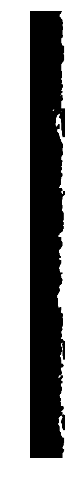

In [37]:
plt.figure(figsize=(4,8))
plt.imshow(im_proc(iarray_b[0]),cmap=plt.cm.gray)
plt.axis('off')

In [9]:
%timeit -r 1 np.array([im_proc(i) for i in iarray_b])

1 loop, best of 1: 674 ms per loop


In [38]:
iarray_p = np.array([im_proc(i) for i in iarray_b])
iarray_p.shape, type(iarray_p)

((100, 792, 62), numpy.ndarray)

In [11]:
%timeit -r 1 np.array([interface_height(i,62) for i in iarray_p])

1 loop, best of 1: 1.48 s per loop


In [29]:
iarray_h = [interface_height(ii,62) for ii in iarray_p]
iarray_h

[({0: array([56, 57, 58, 59, 60, 61]),
   1: array([55, 56, 57, 58, 59, 60, 61]),
   2: array([54, 55, 56, 57, 58, 59, 60, 61]),
   3: array([54, 55, 56, 57, 58, 59, 60, 61]),
   4: array([53, 54, 55, 56, 57, 58, 59, 60, 61]),
   5: array([53, 54, 55, 56, 57, 58, 59, 60, 61]),
   6: array([52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
   7: array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
   8: array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
   9: array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
   10: array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
   11: array([52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
   12: array([53, 54, 55, 56, 57, 58, 59, 60, 61]),
   13: array([53, 54, 55, 56, 57, 58, 59, 60, 61]),
   14: array([54, 55, 56, 57, 58, 59, 60, 61]),
   15: array([55, 56, 57, 58, 59, 60, 61]),
   16: array([56, 57, 58, 59, 60, 61]),
   17: array([56, 57, 58, 59, 60, 61]),
   18: array([56, 57, 58, 59, 60, 61]),
   19: array([56, 57, 58, 59, 60, 61]),
   20: array([57, 

In [13]:
D = {n: np.array([i for i, j in enumerate(k) if j]) for n, k in enumerate(iarray_p[0])}
for i,k in enumerate(D.values()):
    print(i,k)

0 [56 57 58 59 60 61]
1 [56 57 58 59 60 61]
2 [55 56 57 58 59 60 61]
3 [54 55 56 57 58 59 60 61]
4 [54 55 56 57 58 59 60 61]
5 [53 54 55 56 57 58 59 60 61]
6 [53 54 55 56 57 58 59 60 61]
7 [52 53 54 55 56 57 58 59 60 61]
8 [51 52 53 54 55 56 57 58 59 60 61]
9 [51 52 53 54 55 56 57 58 59 60 61]
10 [51 52 53 54 55 56 57 58 59 60 61]
11 [51 52 53 54 55 56 57 58 59 60 61]
12 [52 53 54 55 56 57 58 59 60 61]
13 [53 54 55 56 57 58 59 60 61]
14 [53 54 55 56 57 58 59 60 61]
15 [54 55 56 57 58 59 60 61]
16 [55 56 57 58 59 60 61]
17 [56 57 58 59 60 61]
18 [56 57 58 59 60 61]
19 [56 57 58 59 60 61]
20 [56 57 58 59 60 61]
21 [57 58 59 60 61]
22 [57 58 59 60 61]
23 [57 58 59 60 61]
24 [57 58 59 60 61]
25 [56 57 58 59 60 61]
26 [56 57 58 59 60 61]
27 [56 57 58 59 60 61]
28 [56 57 58 59 60 61]
29 [57 58 59 60 61]
30 [57 58 59 60 61]
31 [57 58 59 60 61]
32 [57 58 59 60 61]
33 [57 58 59 60 61]
34 [57 58 59 60 61]
35 [56 57 58 59 60 61]
36 [56 57 58 59 60 61]
37 [56 57 58 59 60 61]
38 [56 57 58 59 60 61]

[0, 800, 0, 5]

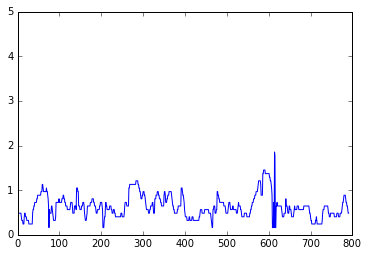

In [59]:
a1,a2 = interface_height(iarray_p[0],62)
a1,a2
plt.plot(5-5*np.flipud(np.array(a2))/62)
plt.axis([0,800,0,5])

In [65]:
h1 = np.zeros((iarray_p.shape[0],iarray_p.shape[1]))
for j,ii in enumerate(iarray_p):
    iarray_D, iarray_h = interface_height(ii,62)
    h1[j] = iarray_h
#h1 = np.array(h1,dtype=int)

In [64]:
iarray_p.shape,np.zeros((iarray_p.shape[0],iarray_p.shape[1])).shape

((100, 792, 62), (100, 792))

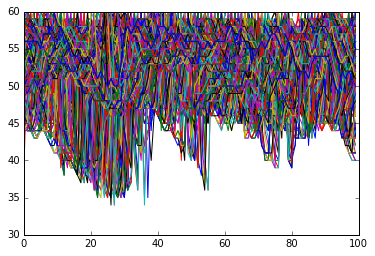

In [68]:
plt.plot(h1)

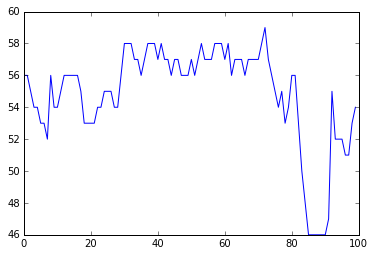

In [74]:
plt.plot(h1[:,0])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

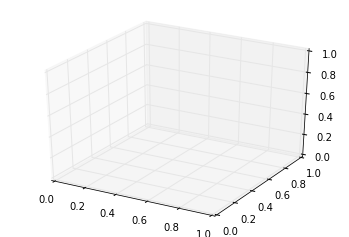

In [82]:
nx, ny = 100, 792
x = range(nx)
y = range(ny)
X,Y=np.meshgrid(x,y)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,h1)

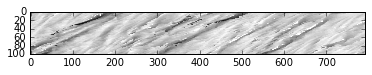

In [81]:
plt.imshow(h1,cmap=plt.cm.gray)